# About Dataset
## Context
E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.

## Content
This is a sales transaction data set of UK-based e-commerce (online retail) for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.

The data set contains 500K rows and 8 columns. The following is the description of each column.

TransactionNo (categorical): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
Date (numeric): the date when each transaction was generated.
ProductNo (categorical): a five or six-digit unique character used to identify a specific product.
Product (categorical): product/item name.
Price (numeric): the price of each product per unit in pound sterling (£).
Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
CustomerNo (categorical): a five-digit unique number that defines each customer.
Country (categorical): name of the country where the customer resides.
There is a small percentage of order cancellation in the data set. Most of these cancellations were due to out-of-stock conditions on some products. Under this situation, customers tend to cancel an order as they want all products delivered all at once.

## Inspiration
Information is a main asset of businesses nowadays. The success of a business in a competitive environment depends on its ability to acquire, store, and utilize information. Data is one of the main sources of information. Therefore, data analysis is an important activity for acquiring new and useful information. Analyze this dataset and try to answer the following questions.

### How was the sales trend over the months?
### What are the most frequently purchased products?
### How many products does the customer purchase in each transaction?
### What are the most profitable segment customers?
### Based on your findings, what strategy could you recommend to the business to gain more profit?

In [67]:
# importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
# to show more columns
pd.set_option("max_column",100)

In [68]:
df = pd.read_csv("/home/omar/Downloads/Sales Transaction v.4a.csv")
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [69]:
df.dtypes

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

In [70]:
df.shape

(536350, 8)

In [72]:
# want to drop duplicated values those has the same value in all columns

df.drop_duplicates(keep="first",inplace=True) #keep first occourance drop others. subset=["column","column"]

In [73]:
# looks like we had some duplicates we get raid of 

df.shape

(531150, 8)

In [74]:
# the amount of duplicates we had
536350 - 531150

5200

### Exploring and cleaning date starting with all null values

In [75]:
# now i will delete all rows with no value in it empty rows
# looks like we did not have any

df = df.dropna(how="all")
df.shape

(531150, 8)

In [77]:
df.Country.unique()

array(['United Kingdom', 'Norway', 'Belgium', 'Germany', 'France',
       'Austria', 'Netherlands', 'EIRE', 'USA', 'Channel Islands',
       'Iceland', 'Portugal', 'Spain', 'Finland', 'Italy', 'Greece',
       'Japan', 'Sweden', 'Denmark', 'Cyprus', 'Malta', 'Switzerland',
       'Australia', 'Czech Republic', 'Poland', 'Hong Kong', 'Singapore',
       'RSA', 'Israel', 'Unspecified', 'United Arab Emirates', 'Canada',
       'European Community', 'Bahrain', 'Brazil', 'Saudi Arabia',
       'Lebanon', 'Lithuania'], dtype=object)

In [78]:
# creating a new column total

df["total"] = df.Price * df.Quantity
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64


In [79]:
# creating year column

df["year"] = pd.to_datetime(df.Date).dt.year

# creating the month column
df["month"] = pd.to_datetime(df.Date).dt.month
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total,year,month
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,2019,12
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,2019,12
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,2019,12
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,2019,12
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,2019,12
...,...,...,...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany,-37.92,2018,12
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,-42.27,2018,12
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,-11.74,2018,12
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,-65.40,2018,12


In [80]:
# creating a data frame for the year 2019
df19 = df[df.year == 2019]
df19.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total,year,month
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,2019,12
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,2019,12
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,2019,12
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,2019,12
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,2019,12


In [82]:
# Checking total sells which might be not right as data is not clear yet.
round(df19.total.sum(),2)

55899561.4

In [83]:
# grouping year and months from date column
years = df.groupby(by=[pd.to_datetime(df.Date).dt.year,pd.to_datetime(df.Date).dt.month])

In [84]:
years.count()

TransactionNo   Date  ProductNo  ProductName  Price  Quantity  \
Date Date                                                                  
2018 12            41565  41565      41565        41565  41565     41565   
2019 1             34530  34530      34530        34530  34530     34530   
     2             27173  27173      27173        27173  27173     27173   
     3             35932  35932      35932        35932  35932     35932   
     4             29235  29235      29235        29235  29235     29235   
     5             36318  36318      36318        36318  36318     36318   
     6             36166  36166      36166        36166  36166     36166   
     7             38780  38780      38780        38780  38780     38780   
     8             34708  34708      34708        34708  34708     34708   
     9             49391  49391      49391        49391  49391     49391   
     10            59367  59367      59367        59367  59367     59367   
     11            82821  82821      82821        82821  82821     82821   
     12            25164  25164      25164        25164  25164     25164   

           CustomerNo  Country  total   year  month  
Date Date                                            
2018 12         41562    41565  41565  41565  41565  
2019 1          34526    34530  34530  34530  34530  
     2          27169    27173  27173  27173  27173  
     3          35926    35932  35932  35932  35932  
     4          29234    29235  29235  29235  29235  
     5          36307    36318  36318  36318  36318  
     6          36160    36166  36166  36166  36166  
     7          38773    38780  38780  38780  38780  
     8          34703    34708  34708  34708  34708  
     9          49389    49391  49391  49391  49391  
     10         59365    59367  59367  59367  59367  
     11         82819    82821  82821  82821  82821  
     12         25162    25164  25164  25164  25164

## How was the sales trend over the months?

In [85]:
# sorting Data Frame with Date column
df19.sort_values('Date',inplace=True)

/usr/lib/python3/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [86]:
# clean the 2019 out of canceled Transactions
# negative values is Quantity column is the canceled transactions
# canceled values
df19canceled = df19[df19.Quantity < 0]
# clean values out of canceled
df19outofcan = df19[df19.Quantity > 0]
df19outofcan.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total,year,month
485157,540551,1/10/2019,84596J,Mixed Nuts Light Green Bowl,11.12,7,14551.0,United Kingdom,77.84,2019,1
485343,540561,1/10/2019,21232,Strawberry Ceramic Trinket Pot,11.53,12,13004.0,United Kingdom,138.36,2019,1
485344,540561,1/10/2019,84580,Mouse Toy With Pink T-Shirt,14.09,4,13004.0,United Kingdom,56.36,2019,1
485345,540561,1/10/2019,22355,Charlotte Bag Suki Design,11.12,10,13004.0,United Kingdom,111.20,2019,1
485346,540561,1/10/2019,22356,Charlotte Bag Pink Polkadot,11.12,10,13004.0,United Kingdom,111.20,2019,1


In [87]:
# putting Date as index
df19.index = df19.Date

In [88]:
df19.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total,year,month
Date,,,,,,,,,,,
1/10/2019,540551,1/10/2019,84596J,Mixed Nuts Light Green Bowl,11.12,7,14551.0,United Kingdom,77.84,2019,1
1/10/2019,540561,1/10/2019,21232,Strawberry Ceramic Trinket Pot,11.53,12,13004.0,United Kingdom,138.36,2019,1
1/10/2019,540561,1/10/2019,84580,Mouse Toy With Pink T-Shirt,14.09,4,13004.0,United Kingdom,56.36,2019,1
1/10/2019,540561,1/10/2019,22355,Charlotte Bag Suki Design,11.12,10,13004.0,United Kingdom,111.20,2019,1
1/10/2019,540561,1/10/2019,22356,Charlotte Bag Pink Polkadot,11.12,10,13004.0,United Kingdom,111.20,2019,1


In [89]:
# finding total of sales over months with groupby
months = df19outofcan.groupby("month")
total = months.sum()["total"]
total

month
1     4548423.47
2     3327342.64
3     4384669.82
4     3579310.06
5     4569952.21
6     4486132.15
7     4571494.88
8     4749801.23
9     6613772.79
10    7212279.85
11    7828489.53
12    2512069.52
Name: total, dtype: float64

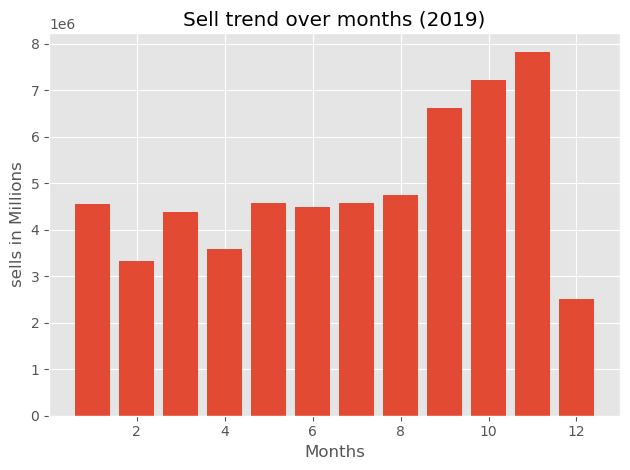

In [90]:
plt.bar(total.index,total)
plt.xlabel("Months")
plt.ylabel("sells in Millions")
plt.title("Sell trend over months (2019)")



plt.tight_layout()
plt.show()

## What are the most frequently purchased products?

In [91]:
# Checking Quantities 

df19outofcan.Quantity.value_counts()

1       128529
2        74187
12       57294
6        37670
4        35588
         ...  
1120         1
77           1
648          1
193          1
1404         1
Name: Quantity, Length: 363, dtype: int64

In [92]:
# exploring about products

df19outofcan.ProductName.value_counts()

Cream Hanging Heart T-Light Holder    2089
Jumbo Bag Red Retrospot               1991
Regency Cakestand 3 Tier              1833
Party Bunting                         1653
Lunch Bag Red Retrospot               1497
                                      ... 
Silver Looking Mirror                    1
Ocean Stripe Hammock                     1
Hen House W Chick In Nest                1
Old Doc Russel Metal Sign                1
Black Diamond Cluster Earrings           1
Name: ProductName, Length: 3676, dtype: int64

In [93]:
# making a group of all products and getting top 5 sum of quantities
# and getting top ten most frequently sold products
products = df19outofcan.groupby("ProductName")
top_5_products = products.sum()["Quantity"].sort_values(ascending=False)[:5]
top_5_products.sort_values(inplace=True)

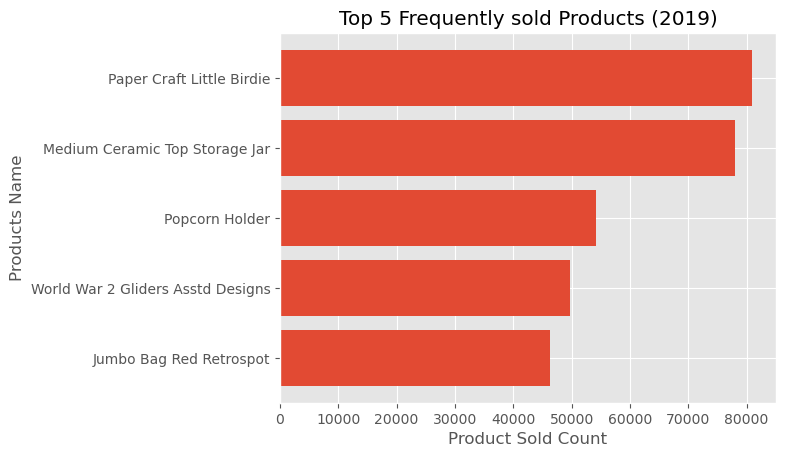

In [94]:
plt.barh(top_5_products.index,top_5_products)

plt.xlabel("Product Sold Count")
plt.ylabel("Products Name")
plt.title("Top 5 Frequently sold Products (2019)")


plt.show()

## How many products does the customer purchase in each transaction?

In [95]:
df19outofcan.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total,year,month
485157,540551,1/10/2019,84596J,Mixed Nuts Light Green Bowl,11.12,7,14551.0,United Kingdom,77.84,2019,1
485343,540561,1/10/2019,21232,Strawberry Ceramic Trinket Pot,11.53,12,13004.0,United Kingdom,138.36,2019,1
485344,540561,1/10/2019,84580,Mouse Toy With Pink T-Shirt,14.09,4,13004.0,United Kingdom,56.36,2019,1
485345,540561,1/10/2019,22355,Charlotte Bag Suki Design,11.12,10,13004.0,United Kingdom,111.20,2019,1
485346,540561,1/10/2019,22356,Charlotte Bag Pink Polkadot,11.12,10,13004.0,United Kingdom,111.20,2019,1


In [96]:
# Creating a transaction group and counting product numbers
# describing it for better exploration of data

trans = df19outofcan.groupby("TransactionNo").count()["ProductNo"].sort_values(ascending=False)
trans.describe()

count    18238.000000
mean        26.412052
std         45.564832
min          1.000000
25%          7.000000
50%         16.000000
75%         29.000000
max       1110.000000
Name: ProductNo, dtype: float64

In [97]:
trans

TransactionNo
573585    1110
581219     747
581492     730
580729     719
558475     704
          ... 
565387       1
550308       1
557940       1
556454       1
559524       1
Name: ProductNo, Length: 18238, dtype: int64

<AxesSubplot:xlabel='ProductNo', ylabel='Count'>

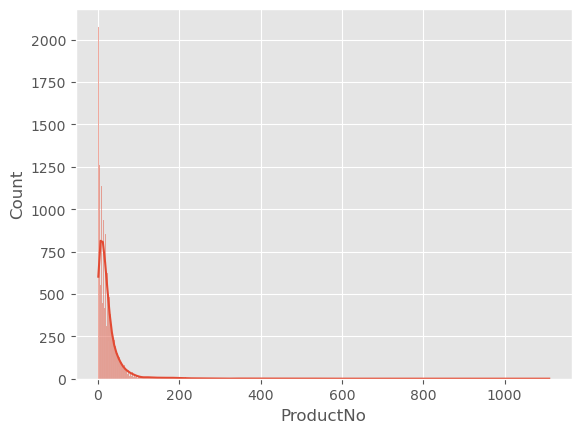

In [98]:
# creating a line plot using seaborn for better understaning of Data

sns.histplot(trans,kde=True)

In [99]:
# it looks very bad in disterbution now i will make a nurmal disterbution
trans

TransactionNo
573585    1110
581219     747
581492     730
580729     719
558475     704
          ... 
565387       1
550308       1
557940       1
556454       1
559524       1
Name: ProductNo, Length: 18238, dtype: int64

In [100]:
# formula for mean - 2 * std and mean + 2 * std
trans.describe()

count    18238.000000
mean        26.412052
std         45.564832
min          1.000000
25%          7.000000
50%         16.000000
75%         29.000000
max       1110.000000
Name: ProductNo, dtype: float64

In [101]:
26.666740 - (2 * 45.829225)

-64.99171

In [102]:
26.666740 + (2 * 45.829225)

118.32519

In [103]:
## removing alil bit of the outlier to have better visualization

trans_no_outlier = trans[(trans < 118) & (trans > -19)]
trans_no_outlier

TransactionNo
564061    117
580677    117
544776    117
560368    117
562558    117
         ... 
565387      1
550308      1
557940      1
556454      1
559524      1
Name: ProductNo, Length: 17724, dtype: int64

Text(0.5, 1.0, 'How many products does the customer purchase in each transaction (2019)')

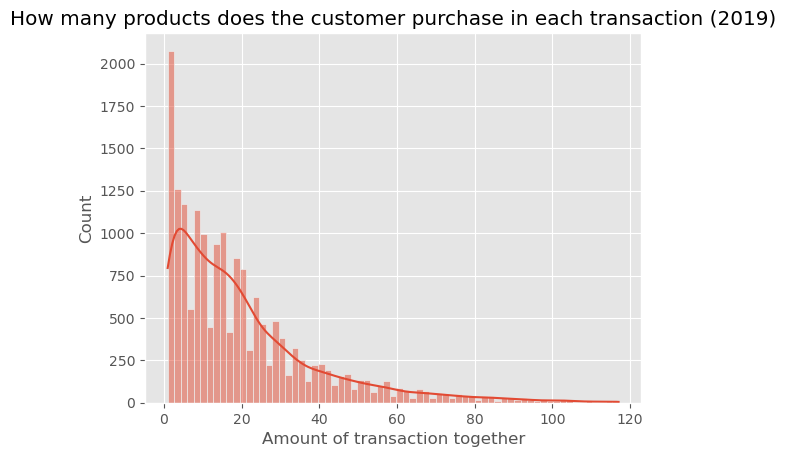

In [104]:
sns.histplot(trans_no_outlier,kde=True)
plt.xlabel("Amount of transaction together")
plt.ylabel("Count")
plt.title("How many products does the customer purchase in each transaction (2019)")

on avrage a customer buys around 25 to 50 

as your can see most of the time they will buy 1 to 4 purchase per transactions

and we have some third party business indiviuals

## What are the most profitable segment customers?

In [105]:
df19.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total,year,month
Date,,,,,,,,,,,
1/10/2019,540551,1/10/2019,84596J,Mixed Nuts Light Green Bowl,11.12,7,14551.0,United Kingdom,77.84,2019,1
1/10/2019,540561,1/10/2019,21232,Strawberry Ceramic Trinket Pot,11.53,12,13004.0,United Kingdom,138.36,2019,1
1/10/2019,540561,1/10/2019,84580,Mouse Toy With Pink T-Shirt,14.09,4,13004.0,United Kingdom,56.36,2019,1
1/10/2019,540561,1/10/2019,22355,Charlotte Bag Suki Design,11.12,10,13004.0,United Kingdom,111.20,2019,1
1/10/2019,540561,1/10/2019,22356,Charlotte Bag Pink Polkadot,11.12,10,13004.0,United Kingdom,111.20,2019,1


In [106]:
# creating a customers group and take sum of their total purchase they have
# to see which customers have the most profit and creating top 5
customers = df19.groupby("CustomerNo")
top_5_cust = customers.sum()["total"].sort_values(ascending=False).iloc[:5]
top_5_cust

CustomerNo
14646.0    2034288.91
12415.0     895267.24
17450.0     866310.31
14911.0     836048.25
18102.0     799971.29
Name: total, dtype: float64

In [107]:
# creating top 5 customers dataframe

top_5_c = df19outofcan[df19outofcan.CustomerNo.isin([14646.0,12415.0,17450.0,14911.0,18102.0])]
top_5_c.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total,year,month
485336,540557,1/10/2019,22523,Childs Garden Fork Pink,11.12,96,12415.0,Australia,1067.52,2019,1
483381,540698,1/11/2019,22350,Illustrated Cat Bowl,13.01,30,17450.0,United Kingdom,390.30,2019,1
483382,540698,1/11/2019,22853,Cat Bowl Vintage Cream,13.79,16,17450.0,United Kingdom,220.64,2019,1
483383,540698,1/11/2019,22852,Dog Bowl Vintage Cream,14.99,16,17450.0,United Kingdom,239.84,2019,1
483384,540698,1/11/2019,22845,Vintage Cream Cat Food Container,17.33,16,17450.0,United Kingdom,277.28,2019,1


In [108]:
# now i want to check what products they buy Frequently 

top_5_c.ProductName.value_counts()

Regency Cakestand 3 Tier              57
Cream Hanging Heart T-Light Holder    42
Roses Regency Teacup And Saucer       40
Set Of 3 Regency Cake Tins            39
Jam Making Set With Jars              36
                                      ..
Photo Frame Linen And Lace Large       1
Blue Knitted Egg Cosy                  1
Jardin Etched Glass Cheese Dish        1
Set 12 Lavender Botanical T-Lights     1
White Brocante Soap Dish               1
Name: ProductName, Length: 1995, dtype: int64

In [109]:
# some Explorations
# its obvious they buys for business

top_5_c.Quantity.unique()

array([  96,   30,   16,    6,   20,   48,   36,  186,  114,   24, 1284,
       1356,  860, 1010,   12,    8,   18,   15,    9,    4,   32,  100,
         72,  120,  240,  144,  192,  288,   40,  200,   64,   60,   50,
        128,  108,  384, 1440,  256,    2,   10,    3,    1,   25,    5,
        576,   80,  160,  168,  640,  360,  400,  300, 1728,  112,  126,
        432,  176,  456,   17, 2400,   42,   78,   84,  252,  216,  104,
        180,   13,   44,   28,  136,  236,  250,    7,  320,   90,  960,
         75,  600,  760,   56,  152,  139,  416,  224,  630,  992,   54,
        264,  324,  698,  204,  140,  480,  504,  208,  342,  378,  304,
       1200,  101,   85,  420,  408,  552,  888,  756,  738,  608,  330,
        188,  612,  588,  156,   74,   34,  150,   83,   87,   79,  102,
        352,  124,  248,  410,  500,  222,  696,  230,  210,  196,  336,
        448,  720, 1152,  350,   93,  450,   92,  528,  852, 1412, 1428,
        708,  666,  306, 1878, 1944,  744,  496,  6

In [111]:
# checking top 5 Based on Quantity in top 5 customers

top_5_c.sort_values('Quantity',ascending=False).head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total,year,month
117762,573003,10/27/2019,23084,Rabbit Night Light,12.38,2400,14646.0,Netherlands,29712.00,2019,10
190978,567423,9/20/2019,23288,Green Vintage Spot Beaker,11.36,1944,17450.0,United Kingdom,22083.84,2019,9
190979,567423,9/20/2019,23285,Pink Vintage Spot Beaker,11.36,1944,17450.0,United Kingdom,22083.84,2019,9
190977,567423,9/20/2019,23286,Blue Vintage Spot Beaker,11.36,1878,17450.0,United Kingdom,21334.08,2019,9
131193,572052,10/20/2019,22595,Gingham Heart Decoration,10.99,1728,14646.0,Netherlands,18990.72,2019,10


In [112]:
# now i will explore canceled Transaactions

df19canceled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882 entries, 484703 to 207656
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionNo  7882 non-null   object 
 1   Date           7882 non-null   object 
 2   ProductNo      7882 non-null   object 
 3   ProductName    7882 non-null   object 
 4   Price          7882 non-null   float64
 5   Quantity       7882 non-null   int64  
 6   CustomerNo     7831 non-null   float64
 7   Country        7882 non-null   object 
 8   total          7882 non-null   float64
 9   year           7882 non-null   int64  
 10  month          7882 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 738.9+ KB


In [113]:
cancel_c = df19canceled.groupby("CustomerNo")
canceld_q = cancel_c.Quantity.sum()
canceld_q.sort_values()

CustomerNo
16446.0   -80995
12346.0   -74215
15749.0    -9014
16029.0    -6420
12931.0    -4427
           ...  
16271.0       -1
15136.0       -1
13598.0       -1
17175.0       -1
15796.0       -1
Name: Quantity, Length: 1436, dtype: int64

In [114]:
df19canceled.ProductName.value_counts()

Regency Cakestand 3 Tier            167
Jam Making Set With Jars             81
Set Of 3 Cake Tins Pantry Design     70
Strawberry Ceramic Trinket Pot       56
Roses Regency Teacup And Saucer      52
                                   ... 
Regency Cake Fork                     1
White Sage Incense                    1
Feather Pen Hot Pink                  1
Large Ivory Heart Wall Organiser      1
Spaceboy Childrens Egg Cup            1
Name: ProductName, Length: 1848, dtype: int64

In [127]:
# let's see what is the most frequent canceled product
top_10_canceled = df19canceled.groupby('ProductName').Quantity.sum().sort_values()[:10]
top_10_canceled

ProductName
Paper Craft Little Birdie            -80995
Medium Ceramic Top Storage Jar       -74494
Fairy Cake Flannel Assorted Colour    -3150
Cream Hanging Heart T-Light Holder    -2050
Gin And Tonic Diet Metal Sign         -2029
Herb Marker Basil                     -1527
Feltcraft Doll Molly                  -1444
Tea Time Party Bunting                -1424
Paper Pocket Traveling Fan            -1385
Pink Blue Felt Craft Trinket Box      -1321
Name: Quantity, dtype: int64

In [116]:
# Checking this customer all of his Data
# I find out this customer buys lots of Paper Craft little birdie at once
# I assume he is in the business of mentioned product
# he bought 80995 in first transactoin and after 50% discount on the product he ordered again
# because the product was out of the stuck at the moment or we did not have that larg quantity he canceled
# his order
# No i was wrong after checking data i find out the 80995 order is just a error that happend during 
# Data collection process.

df[df.CustomerNo == 16446.0]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total,year,month
142,581483,12/9/2019,23843,Paper Craft Little Birdie,12.38,80995,16446.0,United Kingdom,1002718.10,2019,12
1616,C581484,12/9/2019,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom,-501359.05,2019,12
343125,553573,5/18/2019,22980,Pantry Scrubbing Brush,11.94,1,16446.0,United Kingdom,11.94,2019,5
343126,553573,5/18/2019,22982,Pantry Pastry Brush,11.53,1,16446.0,United Kingdom,11.53,2019,5


In [135]:
# now i want to remove these values out of DataFrame because both of them is an error

df = df[~(df.Quantity > 70000)|(df.Quantity < -50000)]
# now i have to do all the things i have done again with this new clean data

In [118]:
# now i will check the secound biggest cancelation which is over -74000
df19.loc[df19.Quantity < -1000]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total,year,month
Date,,,,,,,,,,,
1/18/2019,C541433,1/18/2019,23166,Medium Ceramic Top Storage Jar,11.32,-74215,12346.0,United Kingdom,-840113.80,2019,1
10/11/2019,C570556,10/11/2019,20971,Pink Blue Felt Craft Trinket Box,11.34,-1296,16029.0,United Kingdom,-14696.64,2019,10
10/4/2019,C569552,10/4/2019,15034,Paper Pocket Traveling Fan,10.32,-1200,14533.0,United Kingdom,-12384.00,2019,10
12/9/2019,C581484,12/9/2019,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom,-501359.05,2019,12
4/18/2019,C550456,4/18/2019,21108,Fairy Cake Flannel Assorted Colour,12.40,-3114,15749.0,United Kingdom,-38613.60,2019,4
4/18/2019,C550456,4/18/2019,21175,Gin And Tonic Diet Metal Sign,12.15,-2000,15749.0,United Kingdom,-24300.00,2019,4
4/18/2019,C550456,4/18/2019,85123A,Cream Hanging Heart T-Light Holder,12.86,-1930,15749.0,United Kingdom,-24819.80,2019,4
4/18/2019,C550456,4/18/2019,47566B,Tea Time Party Bunting,12.86,-1300,15749.0,United Kingdom,-16718.00,2019,4
6/13/2019,C556522,6/13/2019,22920,Herb Marker Basil,10.81,-1515,16938.0,United Kingdom,-16377.15,2019,6


In [129]:
# now i want to check this 15749.0 customer as he\she doing a lot of cancelation
# I find this customer bought products due not delivery in time after months he canceled his\her
# order because he finds new cheeper deals

df[df.CustomerNo == 15749.0].sort_values("Quantity")

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total,year,month
378552,C550456,4/18/2019,21108,Fairy Cake Flannel Assorted Colour,12.40,-3114,15749.0,United Kingdom,-38613.6,2019,4
378551,C550456,4/18/2019,21175,Gin And Tonic Diet Metal Sign,12.15,-2000,15749.0,United Kingdom,-24300.0,2019,4
378550,C550456,4/18/2019,85123A,Cream Hanging Heart T-Light Holder,12.86,-1930,15749.0,United Kingdom,-24819.8,2019,4
378549,C550456,4/18/2019,47566B,Tea Time Party Bunting,12.86,-1300,15749.0,United Kingdom,-16718.0,2019,4
378548,C550456,4/18/2019,48185,Doormat Fairy Cake,17.17,-670,15749.0,United Kingdom,-11503.9,2019,4
376377,550461,4/18/2019,48185,Doormat Fairy Cake,16.76,670,15749.0,United Kingdom,11229.2,2019,4
483860,540818,1/11/2019,48185,Doormat Fairy Cake,17.17,670,15749.0,United Kingdom,11503.9,2019,1
376376,550461,4/18/2019,47556B,Tea Time Tea Towels,12.40,1300,15749.0,United Kingdom,16120.0,2019,4
483859,540818,1/11/2019,47556B,Tea Time Tea Towels,12.86,1300,15749.0,United Kingdom,16718.0,2019,1
376375,550461,4/18/2019,85123A,Cream Hanging Heart T-Light Holder,12.71,1930,15749.0,United Kingdom,24530.3,2019,4


In [130]:
# i assume this customer orderer the secound transcation by a miss click or some 
# technical error 

df[df.CustomerNo == 12346.0]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total,year,month
473985,541431,1/18/2019,23166,Medium Ceramic Top Storage Jar,11.32,74215,12346.0,United Kingdom,840113.8,2019,1
475332,C541433,1/18/2019,23166,Medium Ceramic Top Storage Jar,11.32,-74215,12346.0,United Kingdom,-840113.8,2019,1


In [136]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total,year,month
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,2019,12
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,2019,12
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,2019,12
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,2019,12
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,2019,12


In [138]:
df19 = df[df.year == 2019]

In [139]:
# finding total of sales over months with groupby
months = df19.groupby("month")
total = months.sum()["total"]
total

month
1     2797971.25
2     3291955.62
3     4339649.36
4     3405988.90
5     4521865.67
6     4401861.55
7     4495987.99
8     4605702.03
9     6529256.45
10    6964999.33
11    7712836.31
12     988655.04
Name: total, dtype: float64

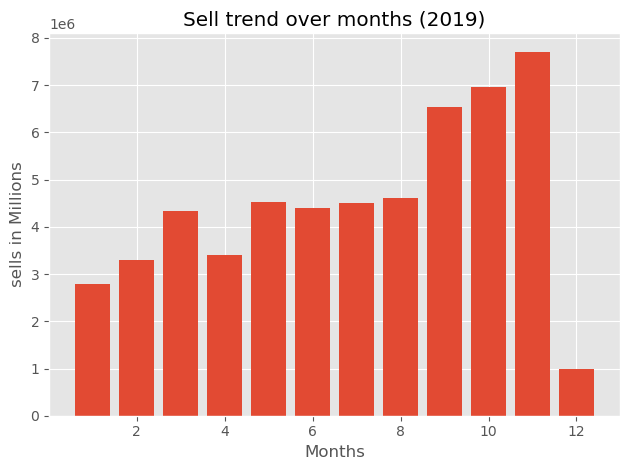

In [140]:
plt.bar(total.index,total)
plt.xlabel("Months")
plt.ylabel("sells in Millions")
plt.title("Sell trend over months (2019)")



plt.tight_layout()
plt.show()

In [145]:
# making a group of all products and getting top 5 sum of quantities
# and getting top ten most frequently sold products
products = df19.groupby("ProductName")
top_5_products = products.sum()["Quantity"].sort_values(ascending=False)[:5]
top_5_products.sort_values(inplace=True)

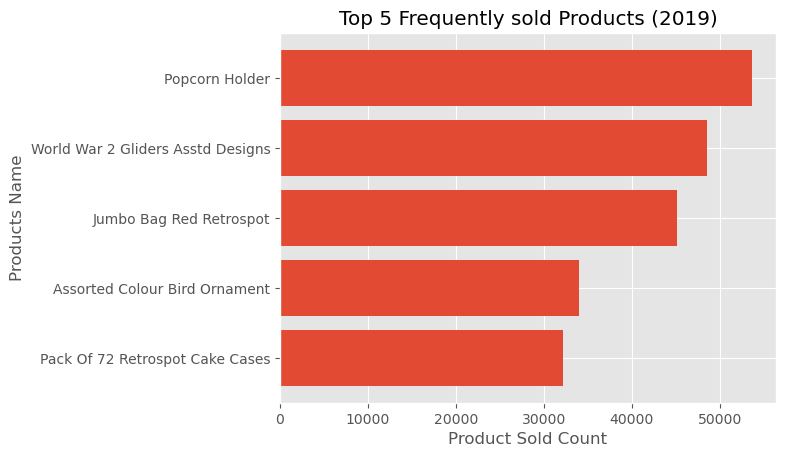

In [146]:
plt.barh(top_5_products.index,top_5_products)

plt.xlabel("Product Sold Count")
plt.ylabel("Products Name")
plt.title("Top 5 Frequently sold Products (2019)")


plt.show()

In [148]:
# Creating a transaction group and counting product numbers
# describing it for better exploration of data

trans = df19.groupby("TransactionNo").count()["ProductNo"].sort_values(ascending=False)
trans.describe()

count    21350.000000
mean        22.931288
std         42.973177
min          1.000000
25%          3.000000
50%         12.000000
75%         26.000000
max       1110.000000
Name: ProductNo, dtype: float64

In [149]:
trans

TransactionNo
573585     1110
581219      747
581492      730
580729      719
558475      704
           ... 
C553536       1
571182        1
C553558       1
571181        1
C556011       1
Name: ProductNo, Length: 21350, dtype: int64

<AxesSubplot:xlabel='ProductNo', ylabel='Count'>

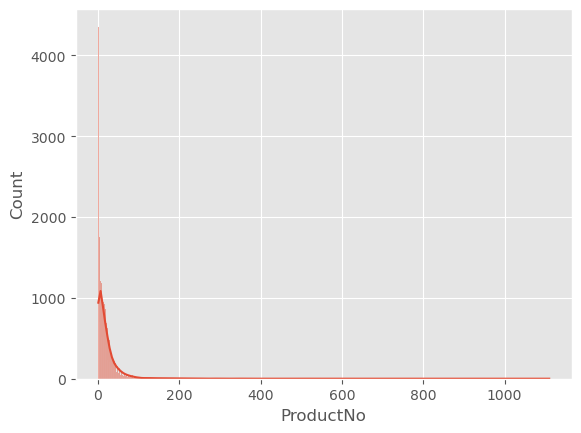

In [150]:
# creating a line plot using seaborn for better understaning of Data

sns.histplot(trans,kde=True)

In [152]:
# creating a customers group and take sum of their total purchase they have
# to see which customers have the most profit and creating top 5
customers = df19.groupby("CustomerNo")
top_5_cust = customers.sum()["total"].sort_values(ascending=False).iloc[:5]
top_5_cust

CustomerNo
14646.0    2034288.91
12415.0     895267.24
17450.0     866310.31
14911.0     836048.25
18102.0     799971.29
Name: total, dtype: float64

In [154]:
# creating top 5 customer dataframe
top_5cus = df19[df19.CustomerNo.isin([14646.0,12415.0,17450.0,14911.0,18102.0])]

In [159]:
# checking their total transactions
top_5cus.total.sum()

5431886.0

In [173]:
# creating top 10 products they bought the most

top10pro = top_5cus.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False)[:10]
top10pro.sort_values(inplace=True)

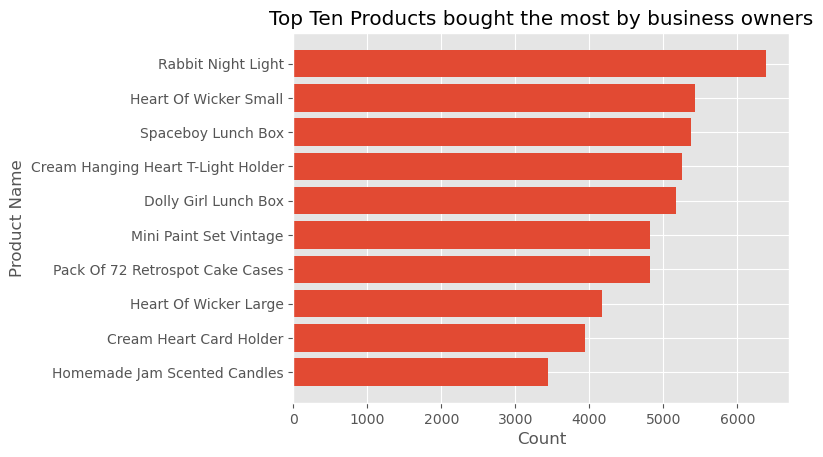

In [176]:
plt.barh(top10pro.index,top10pro)
plt.title("Top Ten Products bought the most by business owners")
plt.xlabel("Count")
plt.ylabel("Product Name")


plt.show()

In [190]:
top_cancel_p = top_5cus[top_5cus.Quantity < 0].sort_values("Quantity")
top_5C = top_cancel_p.groupby("ProductName").Quantity.sum().sort_values()[:5]

In [196]:
top_5C.sort_values(inplace=True,ascending=False)

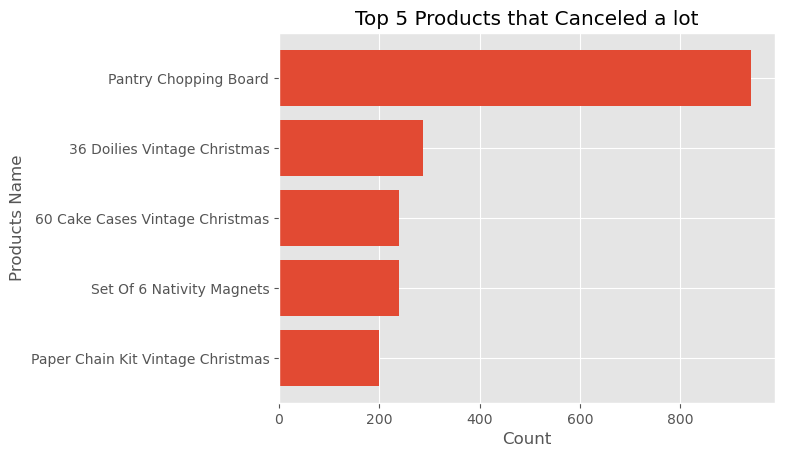

In [198]:
plt.barh(top_5C.index,abs(top_5C))

plt.title("Top 5 Products that Canceled a lot")
plt.xlabel("Count")
plt.ylabel("Products Name")

plt.show()

## Based on your findings, what strategy could you recommend to the business to gain more profit?


## summary

based on my finding I recommend having top 10 products that top customers buy 
 and having top products which canceled a lot in stuck for prevending any cancelation
 and delivery on time to prevent any cancelation. only in 2019 we have over 2.4 million pound sterling (£)
 cancelation
 
 I find most of the business owners canceled and bought the same product after 3 months or more because 
 we were out of stuck. and the price of product decreased by little so they cancel and ordered again 
 
 
 first we should not go out of those 15 products which i listed above 
 secound by just small percent of discount on these product we can sell lots of them to these business owners

In [199]:
df19[df19.total < 0]["total"].sum()

-2484176.75